# TOPIC MODELING

La modélisation de sujet est une technique d'apprentissage automatique non supervisée qui a pour but d’extraire, depuis un ensemble de document; les sujets principaux qui sont représentés par un ensemble de mots.

## Latent Dirichlet Allocation (LDA)

Est un modèle qui part du principe que chaque document est un mélange de sujet et que chaque occurrence d’un mot correspond à un sujet du document. Chaque mot se voit attribuer un sujet selon la loi de Dirichlet. 

Par itération le modèle va attribuer des mots aux sujets, en y appliquant des formules de calcul de probabilité en se reposant sur les principe suivant :

- Chaque document du corpus est un ensemble de mots sans ordre (bag-of-words) ;
- Chaque document m  aborde un certain nombre de thèmes dans différentes proportions qui lui sont propres p(θm)
- Chaque mot possède une distribution associée à chaque thème p(ϕk). On peut ainsi représenter chaque thème par une probabilité sur chaque mot.
- zn représente le thème du mot wn

https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente#/media/Fichier:Latent_Dirichlet_allocation.svg


# 1 Import des donnees

Les donnees proviennes 

In [1]:
import pandas as pd

# indiquer le chemin du fichier
chemin = "https://raw.githubusercontent.com/curiousML/DSA/master/text_mining/data/LA_TRANSITION_ECOLOGIQUE.csv"

# notre dataframe
raw_data = pd.read_csv(chemin, error_bad_lines=False, warn_bad_lines=False)

raw_data.head()

/tmp/ipykernel_5708/1324885382.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  raw_data = pd.read_csv(chemin, error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_5708/1324885382.py:7: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  raw_data = pd.read_csv(chemin, error_bad_lines=False, warn_bad_lines=False)
/tmp/ipykernel_5708/1324885382.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(chemin, error_bad_lines=False, warn_bad_lines=False)


,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,...,"Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?,"Par rapport à votre mode de chauffage actuel, pensez-vous qu'il existe des solutions alternatives plus écologiques ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?","Avez-vous pour vos déplacements quotidiens la possibilité de recourir à des solutions de mobilité alternatives à la voiture individuelle comme les transports en commun, le covoiturage, l'auto-partage, le transport à la demande, le vélo, etc. ?","Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?","Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?",Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?,Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?,Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?
0,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,False,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,97231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enseignement du tri sélectif à l'école,Multiplier les centrales géothermiques
1,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,57000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mettre en oeuvre au niveau national ses engage...,Les problèmes auxquels se trouve confronté l’e...
2,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,False,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,34140,...,"développer les transports en commun ,",NaN,Non,NaN,Oui,NaN,"Les transports en commun, L'auto partage, Le t...",NaN,NaN,NaN
3,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,False,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,17400,...,NaN,Plus de transports publics dans les petites co...,Non,NaN,Non,Le co-voiturage ne correspond pas toujours aux...,Les transports en commun,L'Etat,Elle n'a aucun pouvoir. Impossible de contrain...,NaN
4,2-8,Economie vs Ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,NaN,False,NaN,VXNlcjo3M2YxN2NlZS0xZDRiLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,35430,...,"Aménagement de piste cyclable, développement d...","Détaxer le mode de chauffage écologique, une a...",Oui,une aide significative pour de l'éolien ou du ...,Non,Une piste cyclable pour éviter de risquer ma v...,"Les transports en commun, Le covoiturage, Le vélo","La commune, le département, la région",Demander à Nicolas Hulot,Une vrai politique écologique et non économique


In [2]:
# filtre du dataset sur la colonne question
question = "Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?"
data = raw_data[question]

data

0                   Multiplier les centrales géothermiques
1        Les problèmes auxquels se trouve confronté l’e...
2                                                      NaN
3                                                      NaN
4          Une vrai politique écologique et non économique
                               ...                        
35977                                                  NaN
35978    Il faut que la France montre l'exemple et de m...
35979    Toutes les collectivités et administrations do...
35980    je souhaite insister sur l'intérêt de l'énergi...
35981    Nous allons vers une crise énergétique d'ici à...
Name: Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?, Length: 35982, dtype: object

In [3]:
# suppression des nan
textes = data[data.notnull()]
textes = textes.values.tolist()

## 2 Preprocessing

- Mise en minuscule du texte
- Tokeniser le texte
- Utilisation du modèle français : 'fr_core_news_lg' pour inteprerter les 
- Retirer les stopwords et tout ce qui n'est pas du texte (nombre, ponctuation ...) nom, verbe, adverbe, adjectif 
- Lemmatiser renvoie la forme canonique du mot

In [4]:
import spacy

nlp = spacy.load("fr_core_news_lg")

docs = []
for doc in textes:
    doc = nlp(doc.lower())
    tokens = []
    for token in doc:
        #if len(token.orth_) > 3 and token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV'] and token.is_stop == False and str(token).isalpha(): 
        if len(token.orth_) > 3 and token.is_stop == False and str(token).isalpha():
            tokens.append(token.lemma_)

            
    if len(tokens) > 1:
        docs.append(tokens)
    else:
        pass

/home/quentin/Documents/projet/perso/nlp_reviews_29220905/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
'Multiplier les centrales géothermiques'
['multiplier', 'centrale', 'géothermique']

In [11]:
# avant bigramme 
docs[13]

[['multiplier', 'centrale', 'géothermique']]

## Bigramme

Deuxième étape du processus: transformer les tokens les plus récurrents et adjacents dans la liste de token en un seul et même token. Ce qui a pour but d’aider l'interprétation des token par le modèle.
exemple :
 ['centrale', 'géothermique'] => ['centrale_géothermique']


In [6]:
# creation des bigrammes
import re
from gensim.models import Phrases

bigram = Phrases(docs, min_count=10)

for index in range(len(docs)):
    for token in bigram[docs[index]]:
        
        if '_' in token:
            docs[index].append(token)

In [27]:
# apres bigramme
docs[20]

['aider',
 'développement',
 'énergie',
 'durable',
 'hydroélectrique',
 'récupération',
 'énergie',
 'délaisser',
 'model',
 'établir',
 'subvention',
 'nucléaire']

## LDA

- 1 On stock les données dans un dictionnaire
- 2 Le dictionnaire est converti en Bag Of Words (mot/nombre d’occurrences)
- 3 Extrem filter permet d'enlever les mots les moins fréquents et les mots trop fréquents. Nous filtrons notre dict pour supprimer les paires clé : valeur avec moins de 3 occurrences ou plus de 25 % du nombre total d'échantillons.


In [6]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
print('Nombre de mots unique dans les documents initiaux :', len(dictionary))

dictionary.filter_extremes(no_below=3, no_above=0.25)
print('Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents :', len(dictionary))

print("Exemple :", dictionary.doc2bow(docs[4]))

corpus = [dictionary.doc2bow(text) for text in docs]

Nombre de mots unique dans les documents initiaux : 25122
Nombre de mots unique dans les documents après avoir enlevé les mots fréquents/peu fréquents : 11277
Exemple : [(166, 1), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1)]


## Nombre de topics

Nous pouvons utiliser le score de cohérence dans la modélisation des sujets pour mesurer à quel point les sujets sont interprétables pour les humains. Dans ce cas, les sujets sont représentés par les N premiers mots ayant la probabilité la plus élevée d'appartenir à ce sujet particulier.
Le score de cohérence mesure à quel point ces mots sont similaires les uns aux autres.


In [7]:
from gensim.models import CoherenceModel
import gensim
import gensim.corpora as corpora
from tqdm import tqdm

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=30, step=1)

100%|██████████| 28/28 [06:57<00:00, 14.91s/it]


Le nombre de topic base sur la metric CoherenceModel: 10


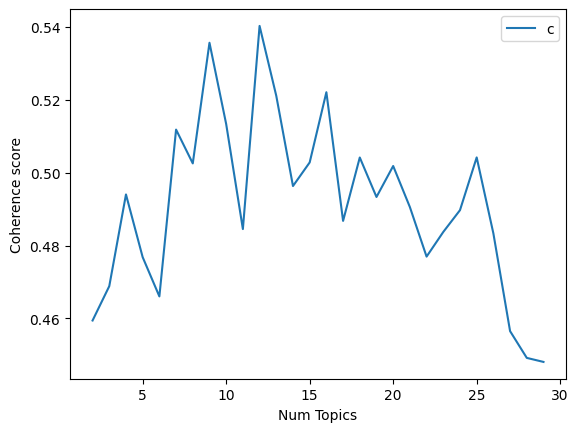

In [8]:
import matplotlib.pyplot as plt

index_max_val = coherence_values.index(max(coherence_values))

print('Le nombre de topic base sur la metric CoherenceModel:', index_max_val)

x = range(2, 30, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Affichage des sujets

In [12]:
model_seleted = model_list[index_max_val]


for (topic, words) in model_seleted.print_topics():
    print("***********")
    print("* topic", topic+1, "*")
    print("***********")
    print(topic+1, ":", words)

***********
* topic 1 *
***********
1 : 0.023*"nucléaire" + 0.021*"énergie" + 0.014*"faire" + 0.014*"falloir" + 0.011*"électrique" + 0.011*"électricité" + 0.010*"centrale" + 0.009*"france" + 0.008*"produire" + 0.007*"voiture"

***********
* topic 2 *
***********
2 : 0.033*"interdire" + 0.026*"produit" + 0.023*"plastique" + 0.018*"emballage" + 0.016*"glyphosate" + 0.015*"pesticide" + 0.012*"chasse" + 0.011*"interdiction" + 0.011*"industriel" + 0.010*"santé"

***********
* topic 3 *
***********
3 : 0.026*"ville" + 0.015*"centre" + 0.012*"zone" + 0.010*"commercial" + 0.010*"grand" + 0.009*"polluer" + 0.008*"arrêter" + 0.008*"nuit" + 0.007*"eau" + 0.006*"installer"

***********
* topic 4 *
***********
4 : 0.023*"voiture" + 0.023*"véhicule" + 0.012*"vitesse" + 0.012*"route" + 0.012*"faire" + 0.012*"transport" + 0.010*"falloir" + 0.008*"prix" + 0.008*"commun" + 0.007*"électrique"

***********
* topic 5 *
***********
5 : 0.020*"falloir" + 0.019*"faire" + 0.010*"politique" + 0.009*"écologique"